### Playground TSK Trapezoidal

In [1]:
from notebook_resolver import *
from src.utils.pandas_extension import *
from src.dataset import Dataset, WorkSheet

dataset_path = "data/e-nose_dataset_12_beef_cuts.xlsx"

dataset = Dataset(
	path=dataset_path, sheet_name=WorkSheet.DS2.value,
)

train_df = dataset.train_df
test_df = dataset.validate_df


In [2]:
from sklearn.metrics import r2_score
from src.pipeline import Pipeline
from src.pipelines.transformers import FeatureScaler
from src.pipelines.predictors import TskPredictor
from src.fis.fuzzy_logic.mfs import MFType1
from src.fis.fuzzy_logic.consequents import LinearModel
from src.clusters import ClusteringMethod

target_column = 'TVC'

pipeline = Pipeline(steps=[
	('feature_scaler', FeatureScaler(decimal_places=4)),
	('predictor', TskPredictor(target=target_column))
])

pipeline.fit(
    train_df, # pipeline fit only for training dataframe
    feature_selection__threshold=0,
    predictor__clustering_method=ClusteringMethod.FUZZY_C_MEANS,
	predictor__mf_type=MFType1.TRAPEZOIDAL,
    predictor__linear_model=LinearModel.LSE
)

transformed_test_df = pipeline.transform(test_df)
X_test_df = transformed_test_df.drop(columns=[target_column])

y_test_ = transformed_test_df[target_column].values
y_pred_ = pipeline.predict(X_test_df)

r2 = r2_score(y_test_, y_pred_)
print(f"R2 Score on Test Data: {r2}")

R2 Score on Test Data: 0.9917365314834913


In [3]:
predictor = pipeline.named_steps['predictor']

In [4]:
predictor.get_lt_rules()

+--------+-----------+------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Rule   | Cluster   | IF (Antecedents)                         | THEN (Consequents)                                                                                                                                                         |
+========+===========+==========================================+============================================================================================================================================================================+
| Rule 1 | Cluster 0 | MQ135 is Low AND MQ136 is Low AND MQ137  | TVC is 0.6227 + -0.2857*MQ135 + 1.1079*MQ136 + 0.3972*MQ137 + -0.2876*MQ138 + 0.0648*MQ2 + -0.1409*MQ3 + -1.3398*MQ4 + -0.0235*MQ5 + 0.0608*MQ6 + 0.0912*MQ8 + -0.0792*MQ9 |
|        |           | is High AND MQ138 is 

,Rule,Cluster,IF (Antecedents),THEN (Consequents)
0,Rule 1,Cluster 0,MQ135 is Low AND MQ136 is Low AND MQ137 is Hig...,TVC is 0.6227 + -0.2857*MQ135 + 1.1079*MQ136 +...
1,Rule 2,Cluster 1,MQ135 is High AND MQ136 is High AND MQ137 is L...,TVC is 0.2485 + -0.1823*MQ135 + 0.3768*MQ136 +...


In [5]:
predictor.clusters_.get_execution_time_stats('_create_mfs_clusters')

{'count': 1,
 'total_time': 2.0978761250153184,
 'average_time': 2.0978761250153184,
 'min_time': 2.0978761250153184,
 'max_time': 2.0978761250153184}

In [6]:
predictor.clusters_.get_execution_time_stats('_create_rules_cluster')

{'count': 1,
 'total_time': 0.7553920841310173,
 'average_time': 0.7553920841310173,
 'min_time': 0.7553920841310173,
 'max_time': 0.7553920841310173}

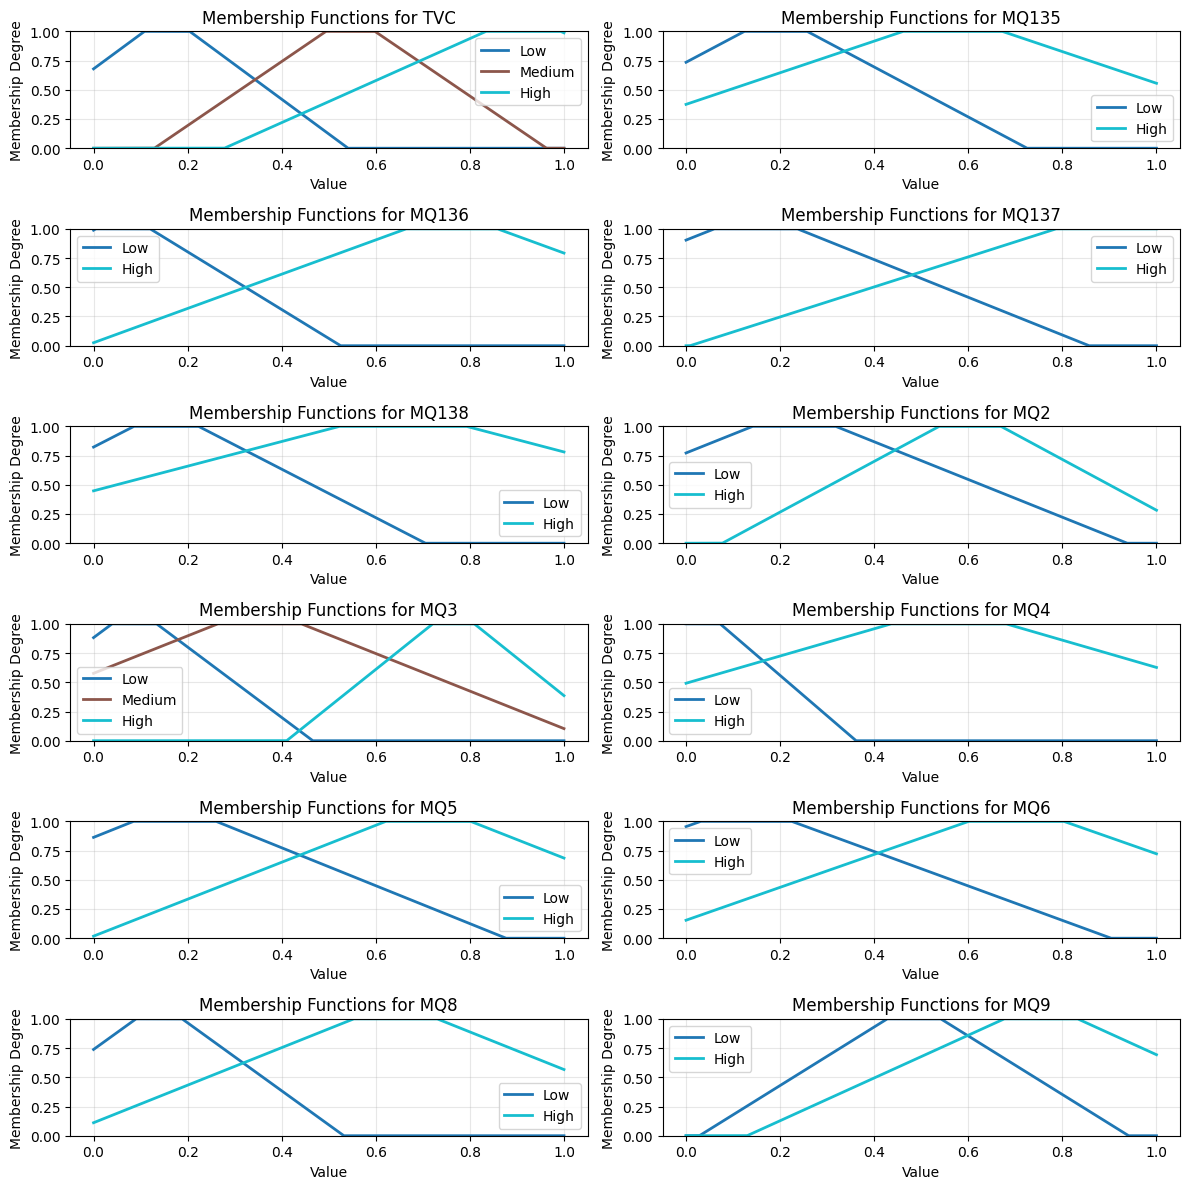

In [7]:
predictor.plot_mfs_grid()

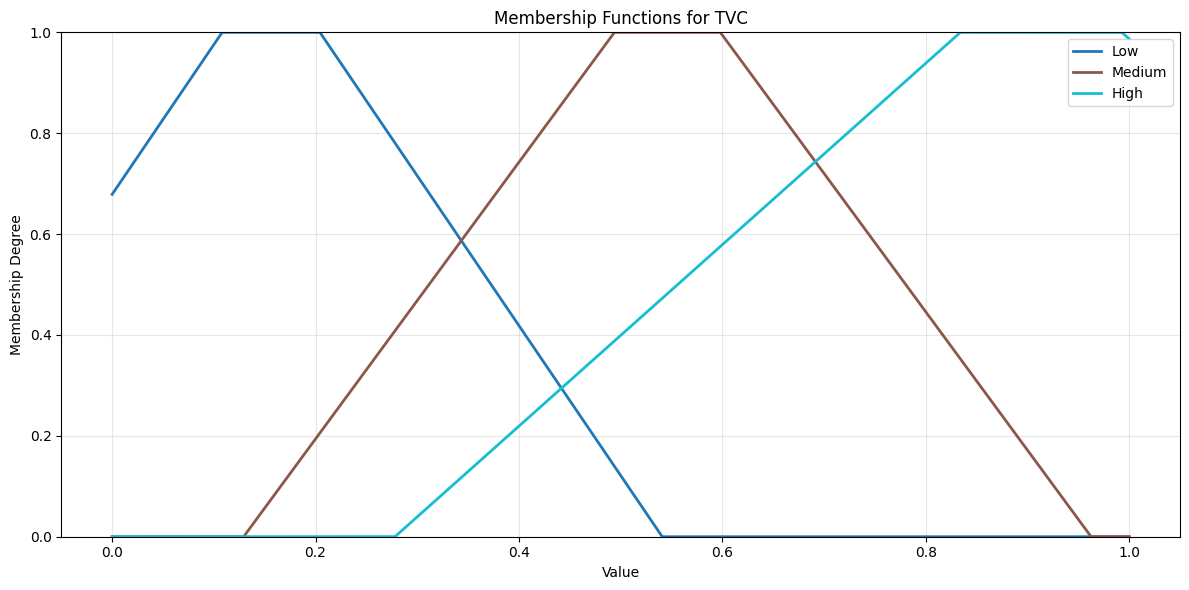

In [8]:
predictor.plot_mf('TVC')

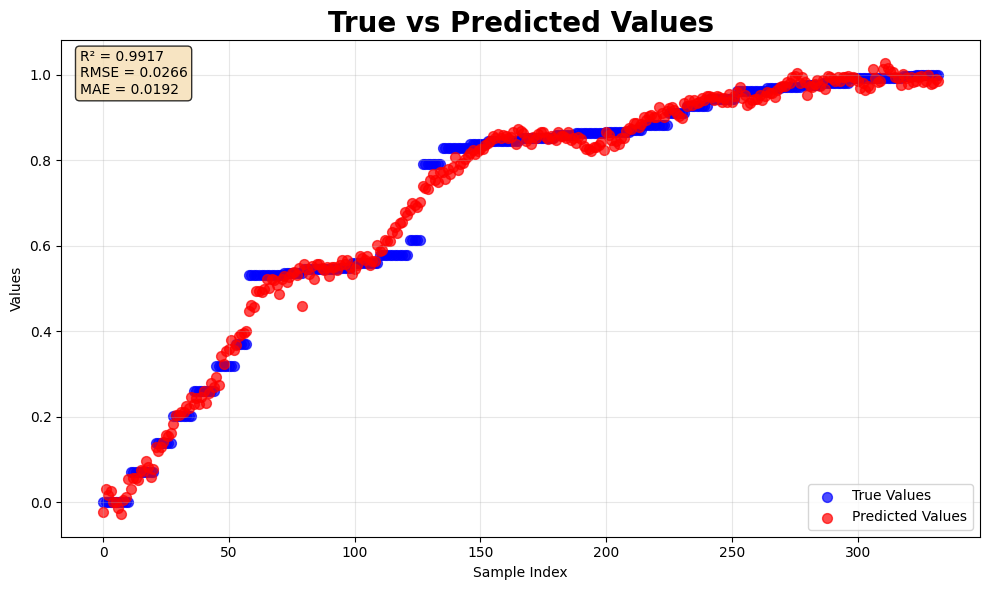

In [9]:
predictor.plot_true_vs_pred(y_test_, y_pred_)